In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# N tane SNR değeri oluşturuldu
N = 20
SNR = np.array([i+1 for i in range(N)])

In [3]:
# snr değerinden varyans hesaplayan fonksiyon
def snr_to_variance(snr):
    
    real = np.power( 10 , snr/10 )
    
    var = 1 / ( np.power( 2*real , 1/2 ) ) 
    
    return var
# her snr değeri için b bulundu
b = snr_to_variance(SNR)

In [4]:
# laplace dağılımlı rastgele değişken oluşturan fonksiyon tanımlandı
def laplace_noise(u,variance,mean=0):
    
    lapl = mean - (variance * np.sign(u) * np.log(1-2* np.abs(u) ) )
    
    return lapl

In [5]:
# düzgün dağılımlı 100000 tane U rastlantı değişkeni oluşturuldu
sample_size = 100000
U = np.random.uniform(-0.5,0.5, (sample_size) )

# her farklı varyans için 100000 adet "n" gürültüleri oluşturuldu
n = np.zeros((N,sample_size))
for i in range(np.size(b)):
    
    n[i] = laplace_noise(U,b[i])

In [6]:
# BER in hesaplandığı fonksiyon (Monte carlo)
def bit_error(n,b,sample_size,p0):
    BER = np.zeros(np.shape(n)[0])
    # hataların hesaplandığı döngü
    for j in range(np.size(b)):
        # gürültüye +1 ve -1 eklendi
        bit_0 = n[j] +1
        bit_1 = n[j] -1
        
        # alfa değeri bulunuyor
        alpha = 0.5*b[j]* np.log((1-p0)/p0)
        
        # her bir işarette yapılan hata sayısı bulundu
        n_error_0 = np.count_nonzero(bit_0 < alpha)
        n_error_1 = np.count_nonzero(bit_1 > alpha)
        
        # bit hata oranı hesaplandı
        BER[j] = p0 * (n_error_0/sample_size)  + (1-p0) * (n_error_1/sample_size)
    
    return BER

In [7]:
# Monte carlo metoduyla Bit hata oranları her iki olasılık için hesaplanıyor
BER_c = bit_error(n,b,sample_size,p0=0.5)
BER_e = bit_error(n,b,sample_size,p0=0.8)

# hem c hem e şıkkı için teorik hata hesaplama kısmı (karşılaştırma için)
Pe_c = 0.5 * np.power(np.e , -1*np.power( 2*(np.power( 10 , SNR/10 ) ) , 1/2) )
Pe_e = 0.4 * np.power(np.e , -1*np.power( 2*(np.power( 10 , SNR/10 ) ) , 1/2) )

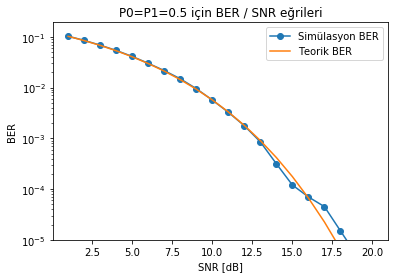

In [8]:
# karşılaştırma plotu
plt.plot(SNR,BER_c, "-o",label="Simülasyon BER")
plt.plot(SNR,Pe_c,label="Teorik BER")
plt.title("P0=P1=0.5 için BER / SNR eğrileri")
plt.yscale("log")
plt.ylim(0.00001)
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.legend()
plt.show()

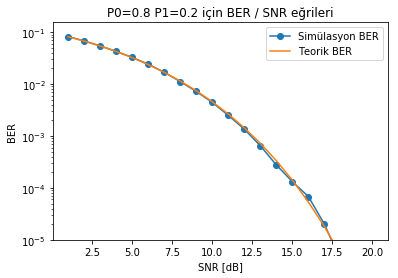

In [9]:
plt.plot(SNR,BER_e, "-o",label="Simülasyon BER")
plt.plot(SNR,Pe_e,label="Teorik BER")
plt.title("P0=0.8 P1=0.2 için BER / SNR eğrileri")
plt.yscale("log")
plt.ylim(0.00001)
plt.xlabel("SNR [dB]")
plt.ylabel("BER")
plt.legend()
plt.show()